(100, 2)
(100,)
########################################
[0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.]
########################################
score Scikit learn: 
0.9090909090909091


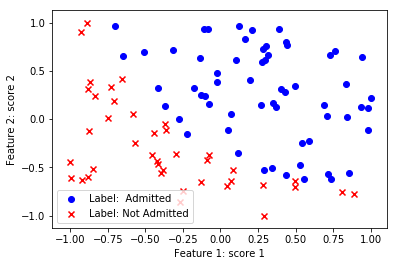

theta  [0.015808968977217012, 0.014030982200249273]
cost is  0.6886958174712052
theta  [1.7920198800927762, 1.6251057941038252]
cost is  0.37210396400568835
theta  [2.5764517180022444, 2.35358660097723]
cost is  0.3134393548415864
theta  [3.0758031030008572, 2.8210921909376734]
cost is  0.2898100759552151
theta  [3.4392392975568247, 3.163057635787686]
cost is  0.2772893938976962
Its a tie!
Your score:  0.9090909090909091
Scikits score:  0.9090909090909091


In [10]:
"""
This scripts includes two types of implementations of logistric regression. The first one is to implement the gradient descent (GD) method from scratch; the other is to call the sklearn library to do the same thing. 

The scripts are from the open source community.

It will also compare how these two methods work to predict the given outcome
for each input tuple in the datasets.
 
"""

import math
import numpy as np
import pandas as pd

from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel

# import self-defined functions
from util import Cost_Function, Gradient_Descent, Cost_Function_Derivative, Cost_Function, Prediction, Sigmoid

########################################################################
########################### Step-1: data preprocessing #################
########################################################################

# scale data to be between -1,1 

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
df = pd.read_csv("data.csv", header=0)

# clean up data
df.columns = ["grade1","grade2","label"]

x = df["label"].map(lambda x: float(x.rstrip(';')))

# formats the input data into two arrays, one of independant variables
# and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)

print(X.shape)
print(Y.shape)


# save the data in
##X = pd.DataFrame.from_records(X,columns=['grade1','grade2'])
##X.insert(2,'label',Y)
##X.to_csv('data2.csv')

########################################################################
########################### Step-2: data splitting #################
########################################################################
# split the dataset into two subsets: testing and training
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

########################################################################
#################Step-3: training and testing using sklearn    #########
########################################################################

# use sklearn class
clf = LogisticRegression()
# call the function fit() to train the class instance
clf.fit(X_train,Y_train)
# scores over testing samples
print('score Scikit learn: ')
print(clf.score(X_test,Y_test))

# visualize data using functions in the library pylab 
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Feature 1: score 1')
ylabel('Feature 2: score 2')
legend(['Label:  Admitted', 'Label: Not Admitted'])
show()



########################################################################
##############Step-4: training and testing using self-developed model ##
########################################################################

#

theta = [0,0] #initial model parameters
alpha = 0.1 # learning rates
max_iteration = 1000 # maximal iterations


m = len(Y) # number of samples

for x in range(max_iteration):
    # call the functions for gradient descent method
    new_theta = Gradient_Descent(X,Y,theta,m,alpha)
    theta = new_theta
    if x % 200 == 0:
        # calculate the cost function with the present theta
        Cost_Function(X,Y,theta,m)
        print('theta ', theta)
        print('cost is ', Cost_Function(X,Y,theta,m))

########################################################################
#################         Step-5: comparing two models         #########
########################################################################
##comparing accuracies of two models. 

score = 0
winner = ""
# accuracy for sklearn
scikit_score = clf.score(X_test,Y_test)
length = len(X_test)
for i in range(length):
    prediction = round(Prediction(X_test[i],theta))
    answer = Y_test[i]
    if prediction == answer:
        score += 1

my_score = float(score) / float(length)
if my_score > scikit_score:
    print('You won!')
elif my_score == scikit_score:
    print('Its a tie!')
else:
    print('Scikit won.. :(')
print('Your score: ', my_score)
print('Scikits score: ', scikit_score) 
